In [1]:
import numpy as np
import sympy
sympy.init_printing()

In [2]:
class Dimension:
    def __init__(self):
        self.length = sympy.symbols('Length')
        self.time = sympy.symbols('Time')
        self.temperature = sympy.symbols('Temperature')
        self.mass = sympy.symbols('Mass')
        self.quantity = sympy.symbols('Quantity')
        self.current = sympy.symbols('Current')
        self.luminosity = sympy.symbols('Luminosity ')
dimension = Dimension()

In [3]:
velocity_dimension = {dimension.length:1, dimension.time:-1}

In [4]:
si_system = {'m': dimension.length, 's': dimension.time,
             'k': dimension.temperature, 'kg': dimension.mass,
             'mol': dimension.quantity, 'A': dimension.current,
             'cd': dimension.luminosity}

si_parameters = {'N': 'kg m s^-2', 'J': 'kg m^2 s^-2', 'C':'A s',
                 'T': 'kg s^-2 A^-1', 'Pa':'kg m^-1 s^-2',
                 'W':'kg m^2 s^-3', 'Hz':'s^-1', 'V':'kg m^2 s^−3 A^−1',
                 'F':'kg^−1 m^−2 s^4 A^2', 'Wb':'kg m^2 s^−2 A^−1',
                 'H':'kg m^2 s^−2 A^−2', 'ohm':'kg m^2 s^−3 A^−2',
                 'rad':'', 'sr':''}
    

In [5]:
def symplify_unit(unit_string:str) -> str:
    for parameter in si_parameters:
        if parameter in unit_string:
            unit_string = unit_string.replace(parameter, si_parameters[parameter])
    return unit_string

def remove_useless_dimensions(unit_dict:dict) -> dict:
    updated_unit_dict = dict()
    for dimension in unit_dict:
        if unit_dict[dimension] != 0:
            updated_unit_dict[dimension] = unit_dict[dimension]
    return updated_unit_dict

In [6]:
def convert_2_fundamental_units(unit_string:str) -> dict:
    unit_string = symplify_unit(unit_string)
    
    unit_dict = dict()
    
    for item in unit_string.split(' '):
        
        unit = item.split('^')[0]
        try:
            power = int(item.split('^')[1])
        except IndexError:
            power = 1

        if si_system[unit] in unit_dict:
            unit_dict[si_system[unit]] = unit_dict[si_system[unit]] + power
        else:
            unit_dict[si_system[unit]] = power
        
        unit_dict = remove_useless_dimensions(unit_dict)
        

    return unit_dict

In [7]:
f = convert_2_fundamental_units('N m')
f

# Dimensional Analysis

In [8]:
class Parameter:
    def __init__(self, symbol, unit):
        self.symbol = sympy.symbols(symbol)
        self.unit = unit
        self.fundamental_unit = convert_2_fundamental_units(self.unit)
    def __str__(self):
        return self.symbol.__str__()

In [14]:
class DimensionalAnalysis:
    def __init__(self, paramters:list):
        self.parameters = paramters
        
    @property
    def fundamental_dimensions(self):
        dimensions = set()
        for p in parameters: # p is parameter
            for d in p.fundamental_unit: # d is dimension
                dimensions.add(d)
        return dimensions
    
    @property
    def dimension_matrix(self):
        matrix = sympy.zeros(len(self.fundamental_dimensions),
                             len(self.parameters))
        for i, d in enumerate(self.fundamental_dimensions):
            for j, p in enumerate(self.parameters):
                if d in p.fundamental_unit:
                    matrix[i,j] = p.fundamental_unit[d]
                else:
                    matrix[i,j] = 0

        return matrix
    
    @property
    def dimensionless_parameters(self):
        dimesionless_list = []
        nullspace = self.dimension_matrix.nullspace()
        nullspace = np.array(nullspace).astype(np.float64)
        for vector in nullspace:
            d = 1
            for i, power in enumerate(list(vector)):
                if power - int(power) == 0:
                    power = int(power)
                d *= (self.parameters[i].symbol**power)
            dimesionless_list.append(d)

        return dimesionless_list
    
    def solve_for(self, parameter):
        solutions = []
        dimensionless_symbol = sympy.symbols('Pi')
        dimensionless_list = self.dimensionless_parameters
        for i in range(len(dimensionless_list)):
            solutions.append(sympy.solve(sympy.Eq(dimensionless_list[i], dimensionless_symbol),
                                         parameter.symbol))
        return solutions

# Fluid Flow

In [15]:
density = Parameter('rho', 'kg m^-3')
viscosity = Parameter('mu', 'kg m^-1 s^-1')
velocity = Parameter('u', 'm s^-1')
diameter = Parameter('D', 'm')

In [16]:
parameters = [density, viscosity, velocity, diameter]

In [17]:
analyze = DimensionalAnalysis(parameters)
analyze.dimensionless_parameters

In [18]:
analyze.solve_for(velocity)

# Pendulum

In [19]:
period = Parameter('T', 's')
g = Parameter('g', 'm s^-2')
length = Parameter('L', 'm')

In [20]:
parameters = [period, g, length]

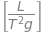

In [21]:
analyze = DimensionalAnalysis(parameters)
analyze.dimensionless_parameters

In [22]:
analyze.solve_for(period)

# Fluid Static

In [23]:
pressure = Parameter('P', 'Pa')
density = Parameter('rho', 'kg m^-3')
g = Parameter('g', 'm s^-2')
height = Parameter('h', 'm')

In [24]:
parameters = [pressure, density, g, height]

In [25]:
analyze = DimensionalAnalysis(parameters)
analyze.dimensionless_parameters

In [26]:
analyze.solve_for(pressure)

# Wave Equation

In [27]:
wave_length = Parameter('lambda', 'm')
velocity = Parameter('C', 'm s^-1')
period = Parameter('T', 's')

In [28]:
parameters = [wave_length, velocity, period]

In [29]:
analyze = DimensionalAnalysis(parameters)
analyze.dimensionless_parameters

In [30]:
analyze.solve_for(wave_length)

In [31]:
'dariush'.replace('da', '')

'riush'